In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [7]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [8]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [9]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [10]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [11]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [12]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the results

In [13]:
def visualizeResults(df, data_scaled, model, team, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(model, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

function to view the average values in each cluster

In [14]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [15]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [16]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [17]:
def stagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('Stages of game in cluster {}'.format(cluster));
        ax=g.axes
        c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [18]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---

### Clustering by Player - K-Means Model


| **Anonymous 26** |
**Anonymous 29** |
**Anonymous 31** |

---
##### Clustering Red Team Victory

In [19]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 29")]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
8540,EUW1_6271991934,Red,anonymous 29,euw1,Sylas,3.871483,11901.0,4967.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8545,EUW1_6271991934,Red,anonymous 29,euw1,Sylas,5.582600,8122.0,2013.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8552,EUW1_6271991934,Red,anonymous 29,euw1,Sylas,8.942800,12085.0,3115.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8582,EUW1_6271991934,Red,anonymous 29,euw1,Sylas,20.371983,4332.0,4168.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8594,EUW1_6271933533,Red,anonymous 29,euw1,Sylas,1.802167,8431.0,12100.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248798,EUW1_6287547539,Red,anonymous 29,euw1,Gragas,25.786067,6476.0,6490.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
248813,EUW1_6287547539,Red,anonymous 29,euw1,Gragas,30.791317,2131.0,3695.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274415,EUW1_6289617638,Red,anonymous 29,euw1,Gragas,8.093283,11120.0,1147.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274438,EUW1_6289617638,Red,anonymous 29,euw1,Gragas,19.405167,5663.0,3790.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [20]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideVictory_df["gameId"]))))

Anonymous 26 played 24 matches


In [21]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 24 matches in which the jungler died at least once
1 players died a total of 105 times on the red side
Victory games on red side contains an average of 4.375 deaths per game


In [22]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
8540,11901.0,4967.0,3.871483
8545,8122.0,2013.0,5.582600
8552,12085.0,3115.0,8.942800
8582,4332.0,4168.0,20.371983
8594,8431.0,12100.0,1.802167
...,...,...,...
248798,6476.0,6490.0,25.786067
248813,2131.0,3695.0,30.791317
274415,11120.0,1147.0,8.093283
274438,5663.0,3790.0,19.405167


Normalize Data:

In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 1.48578058e+00, -2.94896587e-01, -1.55682838e+00],
       [ 3.57249449e-01, -1.12101720e+00, -1.33127544e+00],
       [ 1.54072891e+00, -8.12830025e-01, -8.88346552e-01],
       [-7.74566635e-01, -5.18346272e-01,  6.18205283e-01],
       [ 4.49526803e-01,  1.69993020e+00, -1.82959790e+00],
       [ 1.10323272e+00, -1.06927979e+00, -1.39783824e+00],
       [ 8.57757037e-01, -1.23372086e+00, -4.04638116e-01],
       [ 4.00551120e-01, -6.98728058e-01, -2.10802353e-01],
       [-1.21056967e+00,  1.07236938e+00,  2.68382024e-04],
       [-1.55310081e+00, -1.45465359e+00,  1.02898639e+00],
       [-1.03497392e+00,  3.26232013e-01, -8.54463190e-01],
       [ 5.24483488e-01, -1.46108581e+00,  3.58158228e-01],
       [ 9.37193206e-01, -5.42117515e-01, -1.55858154e+00],
       [ 9.87960682e-01, -8.74075934e-01, -6.41931492e-01],
       [ 1.03412069e-01,  7.78724617e-01, -1.07992286e-01],
       [-6.35105392e-01,  1.95630006e-01,  4.93540085e-01],
       [-7.59635025e-01,  1.13613225e+00

In [24]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3400467136137824
Silhouette score for k=3: 0.3761089442461275
Silhouette score for k=4: 0.3353027881780272
Silhouette score for k=5: 0.31751301927754677
Silhouette score for k=6: 0.30426743880462154
Silhouette score for k=7: 0.2932443076096585
Silhouette score for k=8: 0.2838939935795749
Silhouette score for k=9: 0.2799419817089872
Silhouette score for k=10: 0.2543972586150302
Silhouette score for k=11: 0.2727093643918274
Silhouette score for k=12: 0.25862522161703244
Silhouette score for k=13: 0.2630595730348086
Silhouette score for k=14: 0.2907276992152031
Silhouette score for k=15: 0.26872033568172415
Silhouette score for k=16: 0.2723003882856869
Silhouette score for k=17: 0.2779684587444116
Silhouette score for k=18: 0.30189855771982205
Silhouette score for k=19: 0.2826913760819322
Silhouette score for k=20: 0.30094910452334006
Silhouette score for k=25: 0.316742053222417


K-Means with k = 3

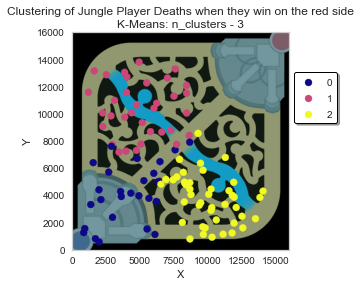

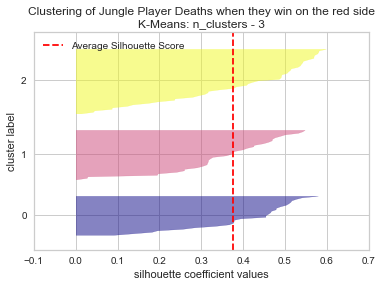

Silhouette score: 0.3761089442461275
2    44
1    34
0    27
Name: cluster, dtype: int64

Inertia: 130.34177676904275

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4179.333333,4192.148148,23.623641
1,1,5068.235294,10374.794118,14.692802
2,2,10046.318182,3780.090909,11.573293


In [25]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [26]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2163.646647,2106.116150,4.656145
1,1,2110.391824,1955.713903,5.808481
2,2,1847.086659,1764.365722,6.451906


In [27]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,8664.0,862.0,7918.0,572.0,36.507367,16.856700
1,1,8627.0,1212.0,13813.0,7188.0,26.191483,1.802167
2,2,14059.0,6542.0,8570.0,797.0,24.740233,2.709167


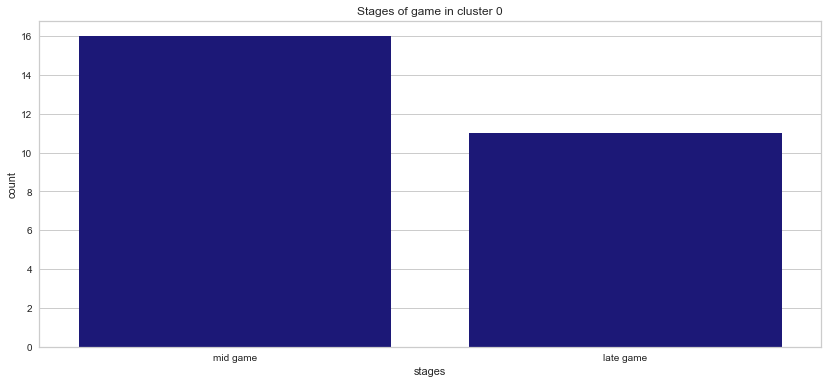

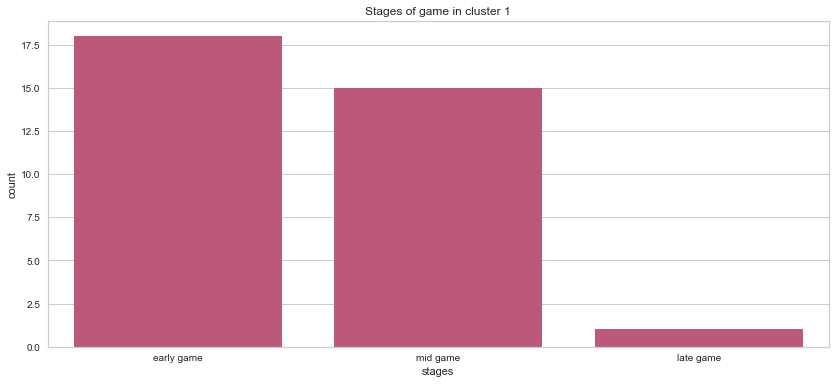

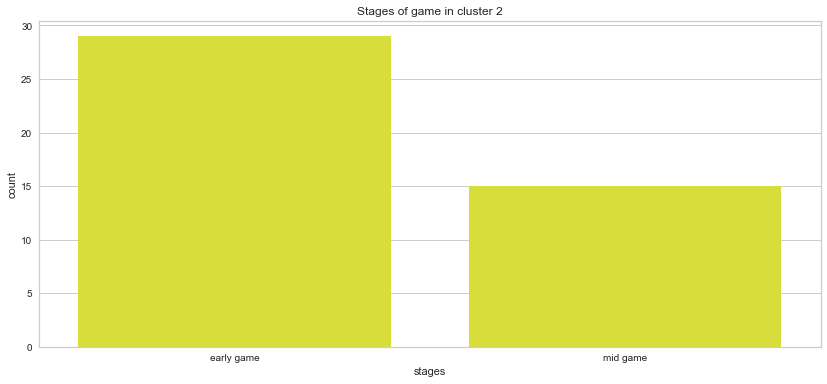

In [28]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 2

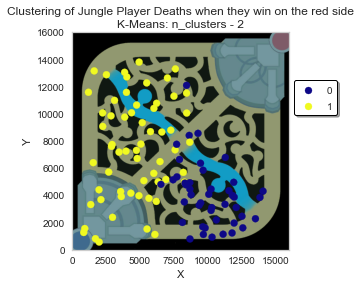

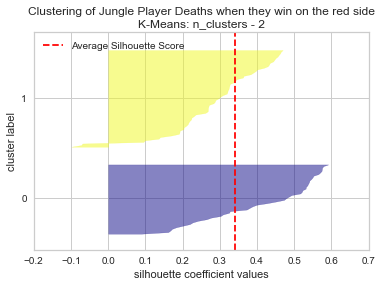

Silhouette score: 0.3400467136137824
1    61
0    44
Name: cluster, dtype: int64

Inertia: 194.3576975019008

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10077.454545,4062.522727,10.842958
1,1,4652.327869,7434.491803,19.172596


In [29]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [30]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1808.063636,2301.154280,6.329291
1,1,2147.053289,3663.938147,6.410532


In [31]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14059.0,6542.0,12100.0,797.0,24.740233,1.802167
1,1,8664.0,862.0,13813.0,572.0,36.507367,3.203383


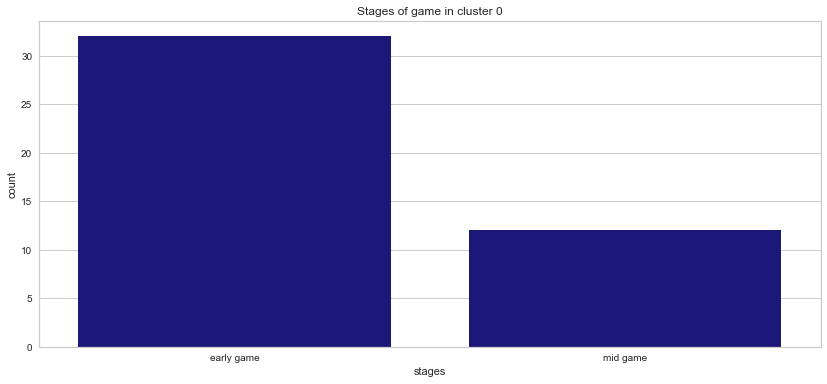

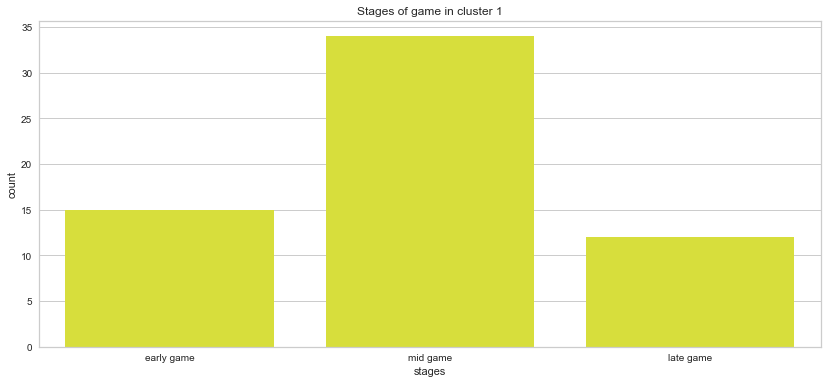

In [32]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [33]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 29")]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
8314,EUW1_6273913105,Red,anonymous 29,euw1,Vi,6.174000,2037.0,13154.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8327,EUW1_6273913105,Red,anonymous 29,euw1,Vi,12.607583,7941.0,7405.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8334,EUW1_6273913105,Red,anonymous 29,euw1,Vi,15.745350,9624.0,1566.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8352,EUW1_6273173026,Red,anonymous 29,euw1,Vi,8.527583,7522.0,6669.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8355,EUW1_6273173026,Red,anonymous 29,euw1,Vi,9.693417,10203.0,4073.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274360,EUW1_6289785391,Red,anonymous 29,euw1,Gragas,8.476300,8125.0,8100.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274378,EUW1_6289785391,Red,anonymous 29,euw1,Gragas,16.201567,7898.0,11166.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274385,EUW1_6289785391,Red,anonymous 29,euw1,Gragas,20.094833,9549.0,14081.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274391,EUW1_6289785391,Red,anonymous 29,euw1,Gragas,23.920950,6543.0,11412.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [34]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideDefeat_df["gameId"]))))

Anonymous 26 played 10 matches


In [35]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 10 matches in which the jungler died at least once
1 players died a total of 65 times on the red side
Defeat games on red side contains an average of 6.5 deaths per game


In [36]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
8314,2037.0,13154.0,6.174000
8327,7941.0,7405.0,12.607583
8334,9624.0,1566.0,15.745350
8352,7522.0,6669.0,8.527583
8355,10203.0,4073.0,9.693417
...,...,...,...
274360,8125.0,8100.0,8.476300
274378,7898.0,11166.0,16.201567
274385,9549.0,14081.0,20.094833
274391,6543.0,11412.0,23.920950


Normalize Data:

In [37]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[-1.73289200e+00,  1.16291409e+00, -1.40187868e+00],
       [-6.32217492e-02, -3.52120918e-01, -4.46122180e-01],
       [ 4.12736083e-01, -1.89087364e+00,  2.00163212e-02],
       [-1.81716302e-01, -5.46079130e-01, -1.05223643e+00],
       [ 5.76479151e-01, -1.23020348e+00, -8.79043244e-01],
       [ 1.43139331e+00,  1.92332434e-01,  1.94016668e-01],
       [-3.34147241e-01,  7.03053922e-01,  4.10964963e-01],
       [ 5.45653600e-01,  4.83533283e-01,  8.65870048e-01],
       [ 1.52839482e+00, -1.58412451e+00, -4.65548538e-01],
       [ 4.42713225e-01, -1.91195605e+00,  7.55718421e-02],
       [-1.56943174e+00,  7.42583449e-01,  8.18331676e-01],
       [ 1.41301110e+00,  1.04933258e+00,  1.15563871e+00],
       [ 1.58976312e+00, -1.43786526e+00, -1.71196752e+00],
       [-1.81179411e+00,  1.00216068e+00, -1.52441131e+00],
       [ 7.86036343e-01, -2.68845381e-01, -1.26685980e+00],
       [-1.47836910e+00,  9.74226477e-01, -8.62895053e-01],
       [ 1.32053444e+00, -1.87822419e+00

In [38]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3712169105771721
Silhouette score for k=3: 0.4348455954630144
Silhouette score for k=4: 0.3461482802554077
Silhouette score for k=5: 0.30580004258603183
Silhouette score for k=6: 0.320912215284404
Silhouette score for k=7: 0.3046048589906101
Silhouette score for k=8: 0.3120885000908518
Silhouette score for k=9: 0.3237314142513323
Silhouette score for k=10: 0.32183132149610333
Silhouette score for k=11: 0.3380749352370919
Silhouette score for k=12: 0.3425720983755888
Silhouette score for k=13: 0.3518377516381338
Silhouette score for k=14: 0.34471422809612634
Silhouette score for k=15: 0.33416796837896884
Silhouette score for k=16: 0.33898960350672747
Silhouette score for k=17: 0.3599861965881508
Silhouette score for k=18: 0.33767073005325915
Silhouette score for k=19: 0.33228333851135355
Silhouette score for k=20: 0.35275481415737264
Silhouette score for k=25: 0.3096972733529348


K-Means with k = 3

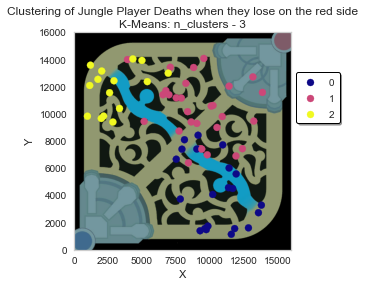

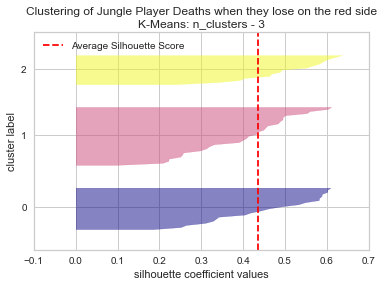

Silhouette score: 0.4348455954630144
1    29
0    21
2    15
Name: cluster, dtype: int64

Inertia: 64.83620195618283

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10435.571429,4322.380952,9.662233
1,1,9200.724138,10329.068966,21.621797
2,2,2981.866667,11857.533333,12.316720


In [39]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [40]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1816.293153,2504.869932,3.950581
1,1,2342.127119,2180.819965,3.536035
2,2,1673.736055,1579.623114,4.481266


In [41]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13786.0,7522.0,8432.0,1143.0,16.119317,3.273233
1,1,13862.0,3933.0,14081.0,6405.0,30.609000,15.708817
2,2,6930.0,985.0,14045.0,9402.0,21.119133,5.349183


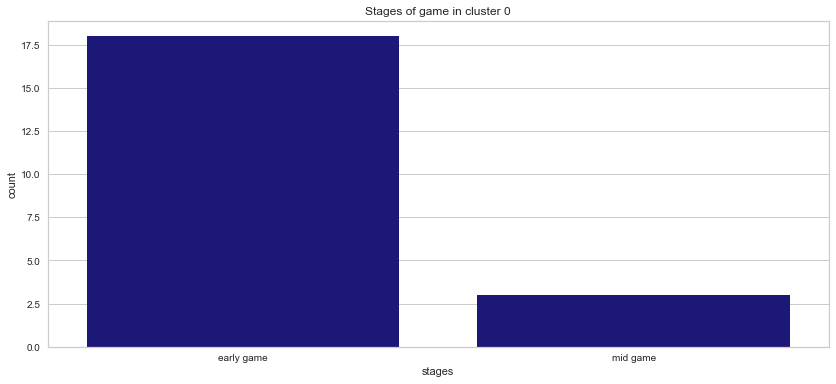

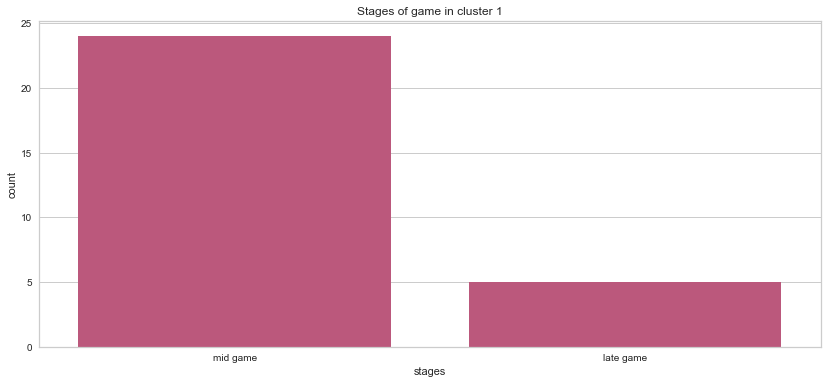

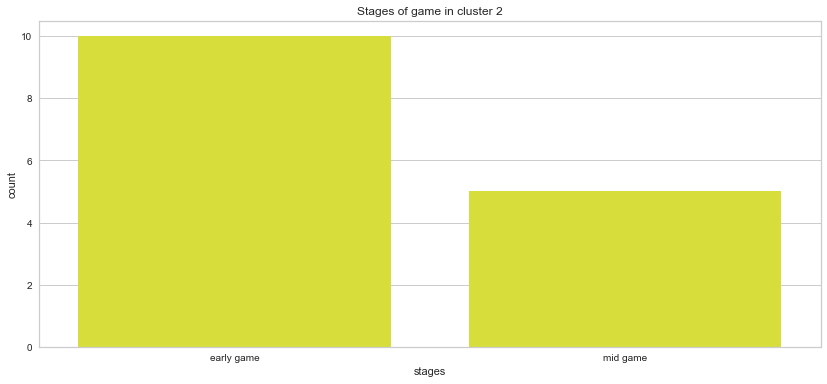

In [42]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 2

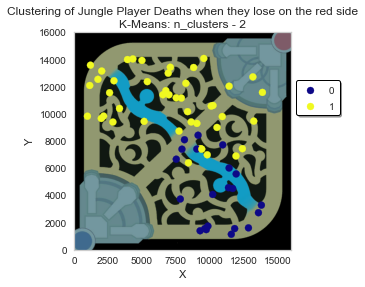

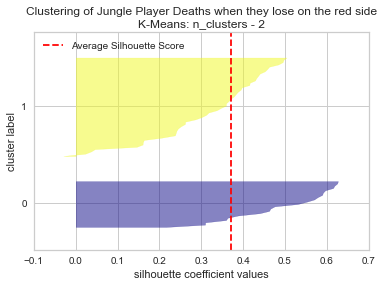

Silhouette score: 0.3712169105771721
1    44
0    21
Name: cluster, dtype: int64

Inertia: 115.91088611364913

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10435.571429,4322.380952,9.662233
1,1,7080.659091,10850.136364,18.449611


In [43]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [44]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1816.293153,2504.869932,3.950581
1,1,3641.456995,2123.718807,5.877218


In [45]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13786.0,7522.0,8432.0,1143.0,16.119317,3.273233
1,1,13862.0,985.0,14081.0,6405.0,30.609000,5.349183


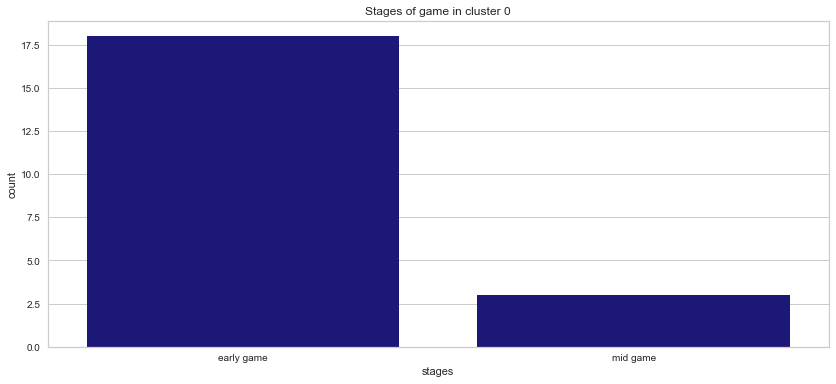

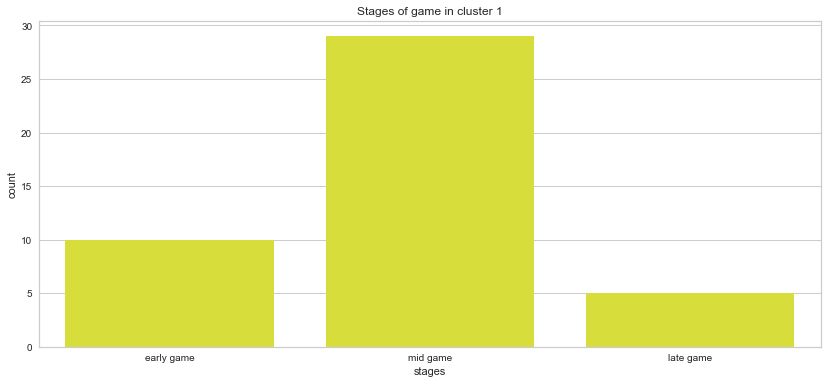

In [46]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [47]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 29")]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
8442,EUW1_6272107557,Blue,anonymous 29,euw1,Graves,3.989800,6976.0,6373.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8463,EUW1_6272107557,Blue,anonymous 29,euw1,Graves,12.781083,2246.0,13352.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8505,EUW1_6272049965,Blue,anonymous 29,euw1,LeeSin,6.756017,12783.0,5247.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8513,EUW1_6272049965,Blue,anonymous 29,euw1,LeeSin,9.123950,3436.0,11086.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
8530,EUW1_6272049965,Blue,anonymous 29,euw1,LeeSin,15.104950,6008.0,9203.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
74187,EUW1_6276631908,Blue,anonymous 29,euw1,Nidalee,4.353500,6288.0,12705.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
74190,EUW1_6276631908,Blue,anonymous 29,euw1,Nidalee,5.749900,13829.0,3253.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
74207,EUW1_6276631908,Blue,anonymous 29,euw1,Nidalee,13.180633,10224.0,4536.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
74211,EUW1_6276631908,Blue,anonymous 29,euw1,Nidalee,15.019200,14106.0,6069.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
74218,EUW1_6276631908,Blue,anonymous 29,euw1,Nidalee,18.568533,8976.0,4176.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [48]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideVictory_df["gameId"]))))

Anonymous 26 played 12 matches


In [49]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 12 matches in which the jungler died at least once
1 players died a total of 49 times on the blue side
Victory games on blue side contains an average of 4.083333333333333 deaths per game


In [50]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
8442,6976.0,6373.0,3.989800
8463,2246.0,13352.0,12.781083
8505,12783.0,5247.0,6.756017
8513,3436.0,11086.0,9.123950
8530,6008.0,9203.0,15.104950
74187,6288.0,12705.0,4.353500
74190,13829.0,3253.0,5.749900
74207,10224.0,4536.0,13.180633
74211,14106.0,6069.0,15.019200
74218,8976.0,4176.0,18.568533


Normalize Data:

In [51]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[-0.0676286 , -0.44325689, -1.57604811],
       [-1.35896832,  1.45639723, -0.50385175],
       [ 1.51774343, -0.7497493 , -1.23867672],
       [-1.03408581,  0.83960167, -0.94988049],
       [-0.33190278,  0.32705708, -0.22042995],
       [-0.25545983,  1.28028658, -1.53169078],
       [ 1.80331242, -1.29250762, -1.36138402],
       [ 0.81910953, -0.94328047, -0.45512212],
       [ 1.87893633, -0.52600439, -0.23088813],
       [ 0.47839242, -1.04127094,  0.20199318],
       [-1.28798558,  1.24952846, -1.67044615],
       [-0.71466351,  1.16297022,  0.26573422],
       [-0.20577192,  0.53882537,  0.64699338],
       [-0.28439895,  0.08670823,  0.81757455],
       [ 1.89913911,  1.65183378,  0.99634136],
       [ 0.69843889, -0.42910271, -1.67979855],
       [-1.37261884, -0.76689763, -1.41440263],
       [-1.14055991,  0.07309845, -0.98198274],
       [ 1.36431152, -0.05891649, -0.26195168],
       [-0.34063911,  1.26586021, -0.12459073],
       [ 0.50487444, -1.92617932,  0.324

In [52]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.33590895699215867
Silhouette score for k=3: 0.31440786296883
Silhouette score for k=4: 0.2848633733039105
Silhouette score for k=5: 0.28837998901061324
Silhouette score for k=6: 0.2702725942859769
Silhouette score for k=7: 0.26877205151426276
Silhouette score for k=8: 0.25356016808252124
Silhouette score for k=9: 0.2794003605832271
Silhouette score for k=10: 0.2811751807701404
Silhouette score for k=11: 0.2934778731628776
Silhouette score for k=12: 0.25283934312691764
Silhouette score for k=13: 0.25994114535535534
Silhouette score for k=14: 0.2809819942566216
Silhouette score for k=15: 0.2802861087197738
Silhouette score for k=16: 0.3312446715742185
Silhouette score for k=17: 0.3096011325745723
Silhouette score for k=18: 0.30379910079071765
Silhouette score for k=19: 0.29466144518970183
Silhouette score for k=20: 0.29775393953025303
Silhouette score for k=25: 0.30494926547983625


K-Means with k = 3

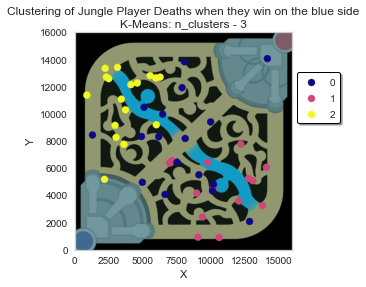

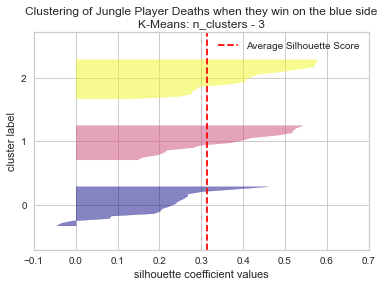

Silhouette score: 0.31440786296883
2    17
0    17
1    15
Name: cluster, dtype: int64

Inertia: 65.53381147769377

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7870.941176,7957.117647,25.484465
1,1,10496.000000,4652.200000,10.910678
2,2,3689.176471,11001.000000,13.635760


In [53]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [54]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3028.458596,3348.754551,3.688244
1,1,2350.396988,2027.448452,5.856098
2,2,1505.091564,2272.658433,5.823685


In [55]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14180.0,1310.0,14070.0,2087.0,32.172933,16.808017
1,1,14106.0,6976.0,7785.0,901.0,19.576783,3.139117
2,2,6288.0,895.0,13424.0,5184.0,22.976033,3.215800


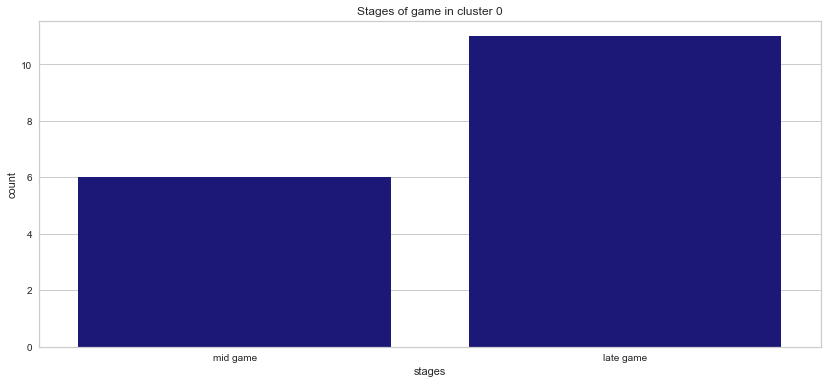

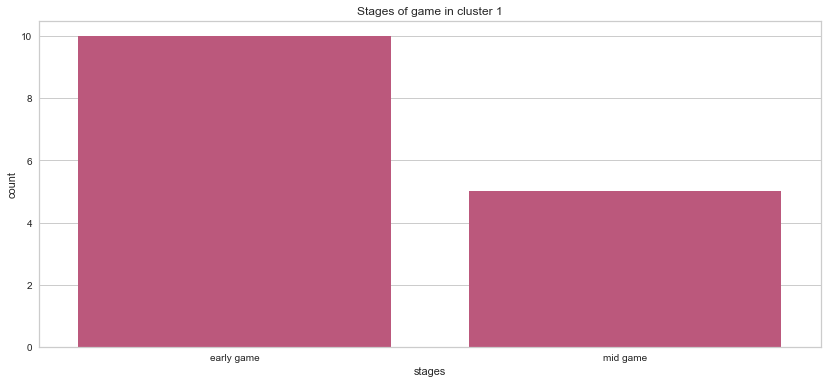

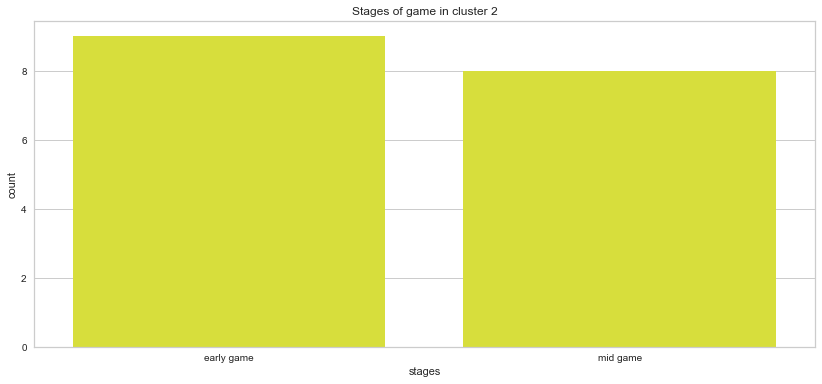

In [56]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 2

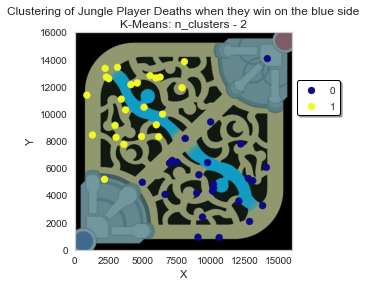

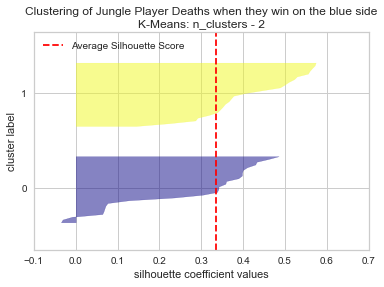

Silhouette score: 0.33590895699215867
0    25
1    24
Name: cluster, dtype: int64

Inertia: 89.95121667990598

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10051.36,5348.160000,16.812263
1,1,4278.25,10765.291667,17.016559


In [57]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [58]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2522.030973,2716.717205,8.977292
1,1,1939.585721,2212.737002,7.299857


In [59]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14180.0,4980.0,14070.0,901.0,32.172933,3.139117
1,1,8075.0,895.0,13842.0,5184.0,28.917050,3.215800


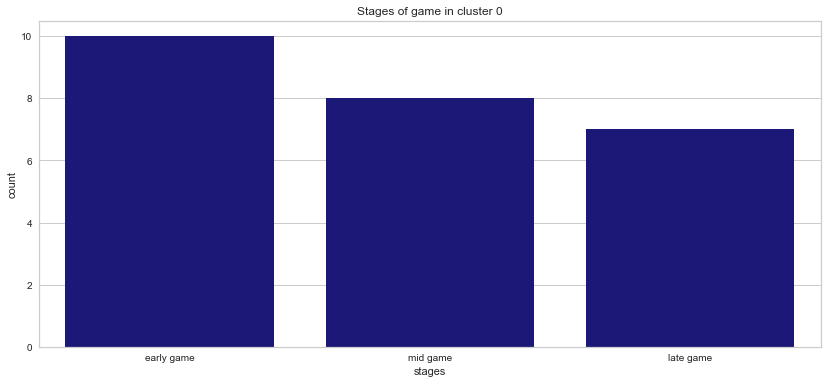

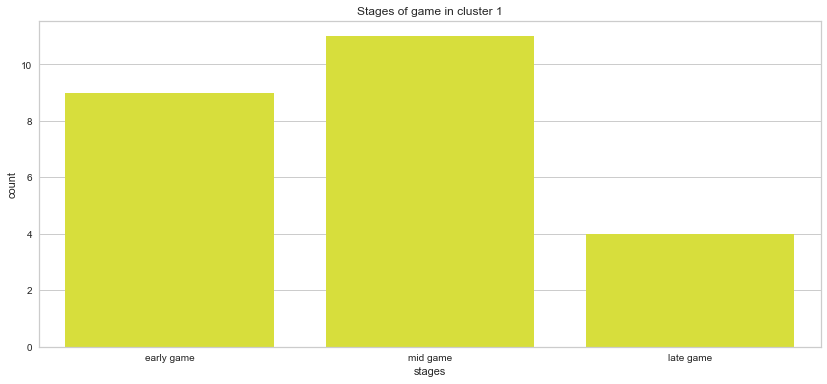

In [60]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [61]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 29")]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
39140,EUW1_6274832916,Blue,anonymous 29,euw1,Sejuani,3.946517,6480.0,7005.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
39152,EUW1_6274832916,Blue,anonymous 29,euw1,Sejuani,9.330217,5489.0,4986.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
39157,EUW1_6274832916,Blue,anonymous 29,euw1,Sejuani,11.475317,3752.0,12793.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
39162,EUW1_6274832916,Blue,anonymous 29,euw1,Sejuani,14.281050,3144.0,10940.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
39167,EUW1_6274832916,Blue,anonymous 29,euw1,Sejuani,16.168017,2206.0,12145.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248743,EUW1_6287559808,Blue,anonymous 29,euw1,Nidalee,37.437350,2400.0,1975.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274589,EUW1_6289102925,Blue,anonymous 29,euw1,Sejuani,9.748700,11534.0,1245.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274609,EUW1_6289102925,Blue,anonymous 29,euw1,Sejuani,18.718250,5720.0,9380.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274622,EUW1_6289102925,Blue,anonymous 29,euw1,Sejuani,25.444100,9249.0,7481.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [62]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideDefeat_df["gameId"]))))

Anonymous 26 played 20 matches


In [63]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 20 matches in which the jungler died at least once
1 players died a total of 118 times on the blue side
Defeat games on blue side contains an average of 5.9 deaths per game


In [64]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
39140,6480.0,7005.0,3.946517
39152,5489.0,4986.0,9.330217
39157,3752.0,12793.0,11.475317
39162,3144.0,10940.0,14.281050
39167,2206.0,12145.0,16.168017
...,...,...,...
248743,2400.0,1975.0,37.437350
274589,11534.0,1245.0,9.748700
274609,5720.0,9380.0,18.718250
274622,9249.0,7481.0,25.444100


Normalize Data:

In [65]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[-0.02009973,  0.10164479, -1.63788756],
       [-0.28970546, -0.50056496, -1.04183143],
       [-0.76226364,  1.82803907, -0.80433676],
       [-0.9276726 ,  1.27534236, -0.49370011],
       [-1.18285946,  1.63475927, -0.28478467],
       [-1.60644787, -0.64015593, -0.17129814],
       [-1.55203703, -0.52174222, -0.0727323 ],
       [ 1.28494434, -0.30847824, -1.37942164],
       [ 1.99146914,  0.08553814, -0.76308253],
       [-0.04893748,  0.15205264, -0.15260946],
       [ 0.64779337,  0.82256652,  0.88512741],
       [ 0.76450463,  0.70981997,  1.03994199],
       [ 2.0600268 ,  1.50888878,  1.47960217],
       [-0.64908908,  0.15712325, -1.55254663],
       [ 0.13306679,  0.20305703, -1.45841308],
       [-1.00085518,  1.63625063, -1.04887844],
       [ 0.304733  ,  0.46881676, -0.39489254],
       [-0.10280422, -0.12533967,  0.25647679],
       [ 0.078928  ,  0.97856241,  0.88996935],
       [-0.30602872, -0.50444249, -1.8506116 ],
       [ 1.6922095 , -1.00076593, -0.841

In [66]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.30073922809691617
Silhouette score for k=3: 0.32293836719943936
Silhouette score for k=4: 0.320510494214021
Silhouette score for k=5: 0.31858290142217177
Silhouette score for k=6: 0.31637109640693006
Silhouette score for k=7: 0.3166271870616444
Silhouette score for k=8: 0.3334237785158036
Silhouette score for k=9: 0.34685344020280706
Silhouette score for k=10: 0.3519540960312738
Silhouette score for k=11: 0.331764089068337
Silhouette score for k=12: 0.33958896523274146
Silhouette score for k=13: 0.33333689804177835
Silhouette score for k=14: 0.31501340645864667
Silhouette score for k=15: 0.29997713895756745
Silhouette score for k=16: 0.3210564788941372
Silhouette score for k=17: 0.32841184526243294
Silhouette score for k=18: 0.32315826208789505
Silhouette score for k=19: 0.31011049871916396
Silhouette score for k=20: 0.3201304217963574
Silhouette score for k=25: 0.3175848080863356


K-Means with k = 10

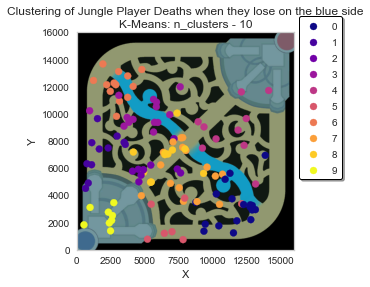

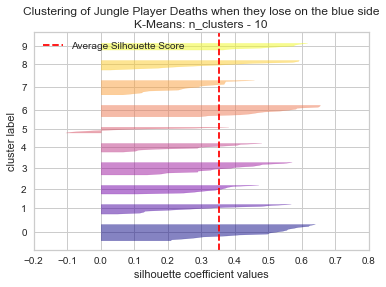

Silhouette score: 0.3519540960312738
0    18
7    16
3    14
6    13
8    11
1    11
4    10
2    10
9     8
5     7
Name: cluster, dtype: int64

Inertia: 57.407986243923524

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11595.222222,3260.388889,8.493759
1,1,1817.000000,7136.727273,17.606627
2,2,5539.900000,5997.100000,30.748013
3,3,4885.142857,10088.285714,24.525786
4,4,11386.700000,8844.900000,25.724217
5,5,7435.285714,2088.714286,28.267748
6,6,3003.769231,12118.769231,11.479515
7,7,7990.562500,5854.062500,18.620973
8,8,6491.181818,6768.454545,7.185082
9,9,2081.375000,2406.000000,29.078273


In [67]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [68]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1433.703385,1458.642715,3.379060
1,1,1046.094816,1439.198773,4.145118
2,2,1263.581137,791.578227,4.844678
3,3,1689.270673,923.519079,3.525899
4,4,1715.573610,1915.751991,4.039983
5,5,2152.128363,1258.553559,4.971198
6,6,917.516812,1001.029866,3.932261
7,7,1596.356710,1693.385938,2.116752
8,8,1394.434575,1376.526615,3.451459
9,9,782.243239,649.227233,4.128743


In [69]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13874.0,8764.0,6951.0,1245.0,13.328017,2.717133
1,1,3574.0,649.0,9653.0,4518.0,24.515400,9.431683
2,2,7643.0,4104.0,8181.0,5005.0,39.551717,23.342717
3,3,7614.0,948.0,11994.0,8668.0,31.865667,18.718250
4,4,14126.0,8935.0,11723.0,4842.0,32.104317,18.165900
5,5,12133.0,5208.0,3802.0,748.0,35.203700,20.026983
6,6,4789.0,1233.0,13674.0,9821.0,16.685083,3.266900
7,7,10726.0,4758.0,8256.0,3343.0,22.129217,14.426200
8,8,9334.0,4168.0,10057.0,4973.0,13.248400,2.025150
9,9,2727.0,530.0,3467.0,1393.0,37.437350,24.270533


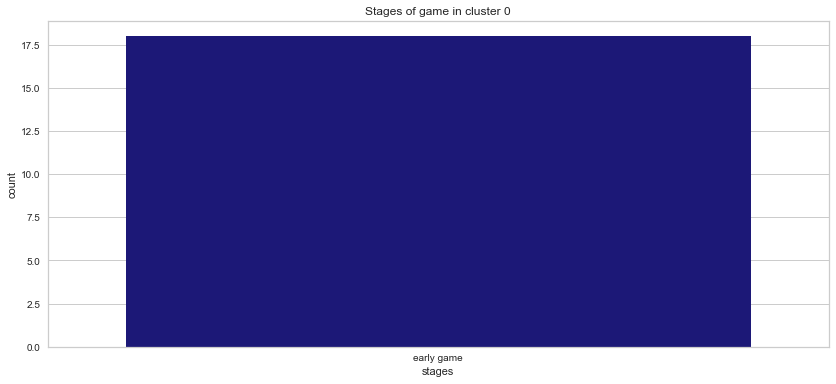

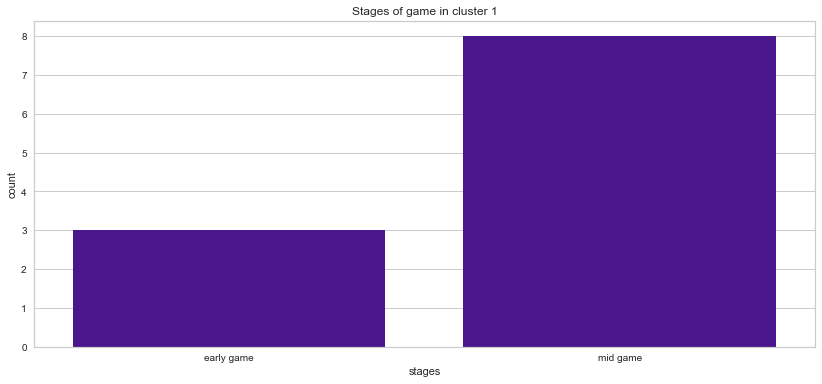

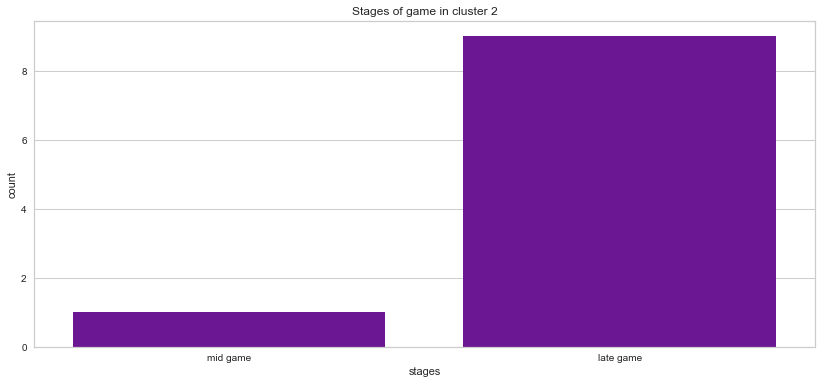

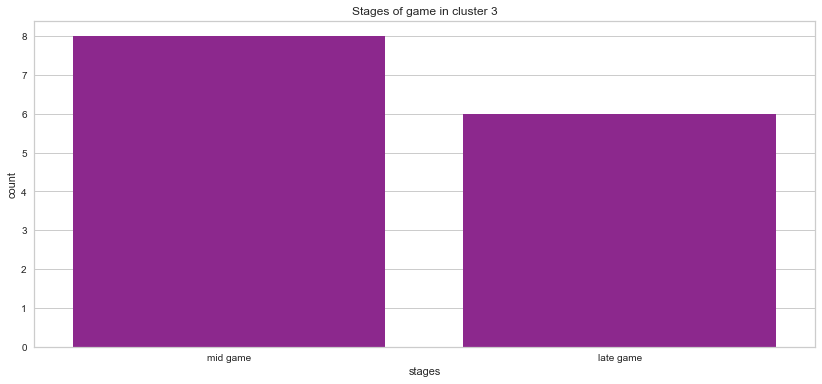

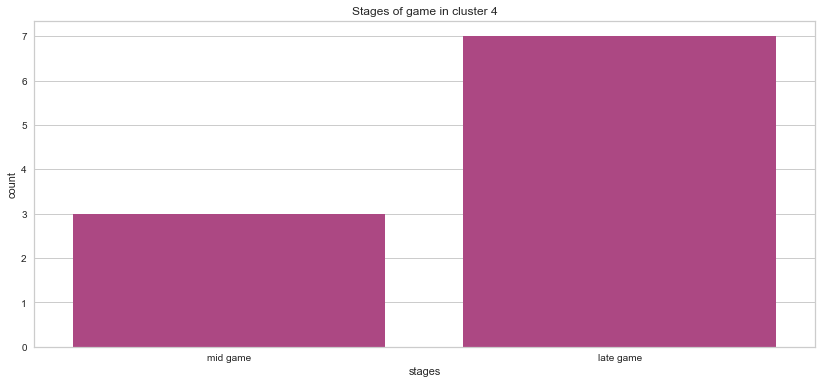

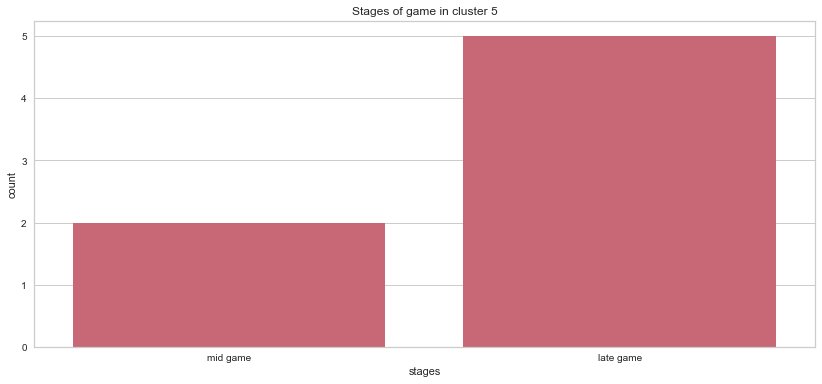

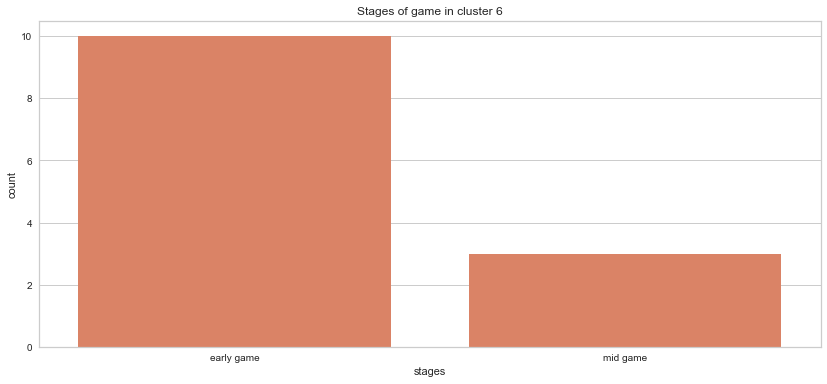

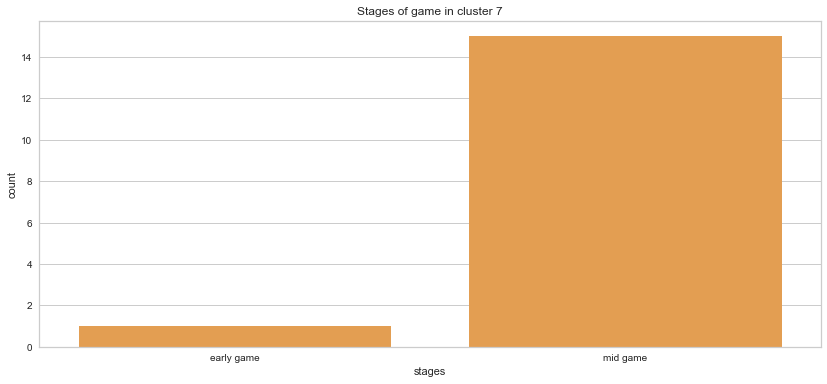

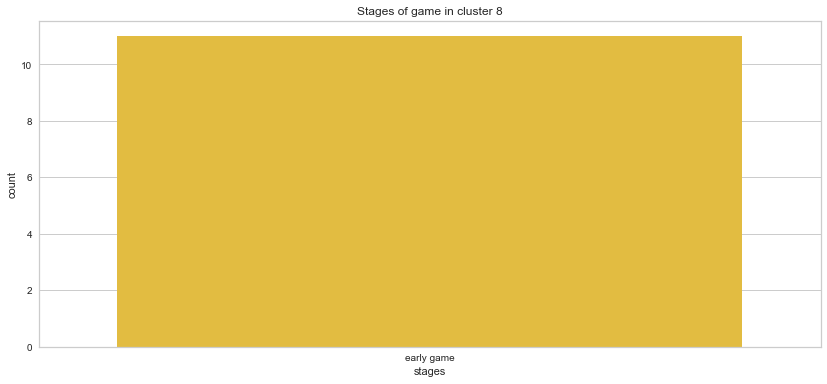

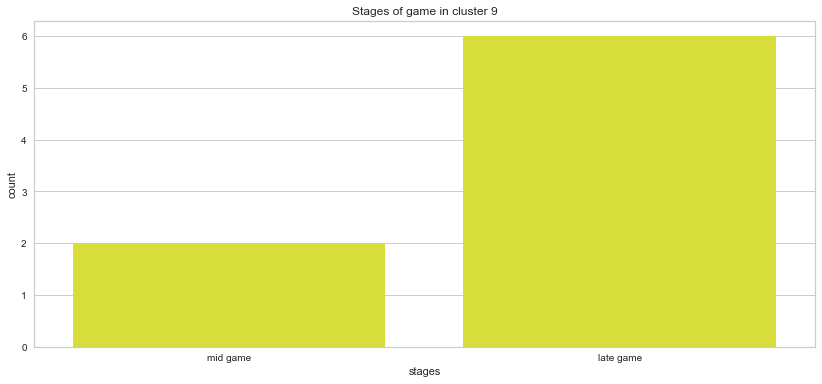

In [70]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 9

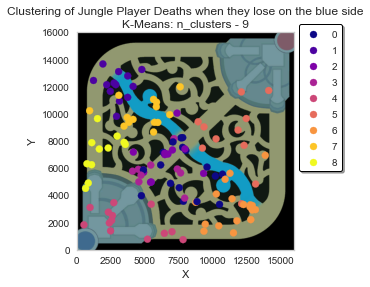

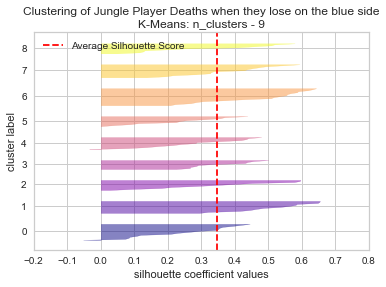

Silhouette score: 0.34685344020280706
6    18
0    17
7    14
1    13
4    13
2    11
8    11
5    11
3    10
Name: cluster, dtype: int64

Inertia: 62.220047361906964

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7809.294118,5855.529412,18.898723
1,1,3003.769231,12118.769231,11.479515
2,2,6491.181818,6768.454545,7.185082
3,3,5843.300000,5789.400000,31.934112
4,4,3740.153846,2052.000000,28.305668
5,5,11454.545455,8349.090909,25.869564
6,6,11595.222222,3260.388889,8.493759
7,7,4885.142857,10088.285714,24.525786
8,8,1817.000000,7136.727273,17.606627


In [71]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [72]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1710.024312,1642.836146,2.334821
1,1,917.516812,1001.029866,3.932261
2,2,1394.434575,1376.526615,3.451459
3,3,1429.080547,1031.459374,4.308775
4,4,2266.875581,903.676678,4.520031
5,5,1649.745400,2407.223767,3.879298
6,6,1433.703385,1458.642715,3.379060
7,7,1689.270673,923.519079,3.525899
8,8,1046.094816,1439.198773,4.145118


In [73]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10726.0,4758.0,8256.0,3343.0,23.342717,14.426200
1,1,4789.0,1233.0,13674.0,9821.0,16.685083,3.266900
2,2,9334.0,4168.0,10057.0,4973.0,13.248400,2.025150
3,3,7943.0,4104.0,8181.0,3802.0,39.551717,26.009967
4,4,7825.0,530.0,3467.0,748.0,37.437350,20.026983
5,5,14126.0,8935.0,11723.0,3391.0,32.104317,18.165900
6,6,13874.0,8764.0,6951.0,1245.0,13.328017,2.717133
7,7,7614.0,948.0,11994.0,8668.0,31.865667,18.718250
8,8,3574.0,649.0,9653.0,4518.0,24.515400,9.431683


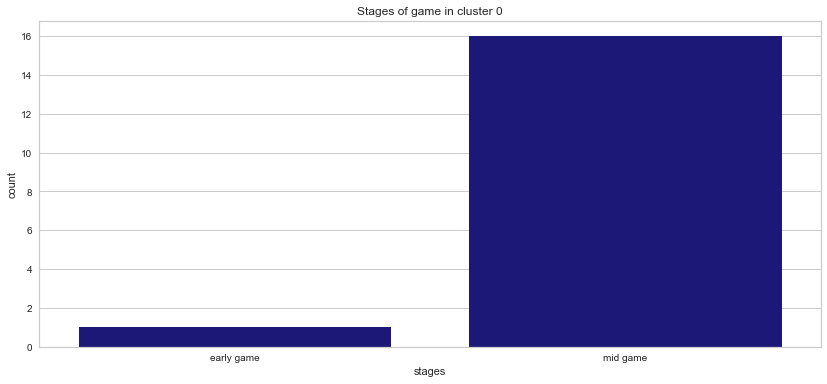

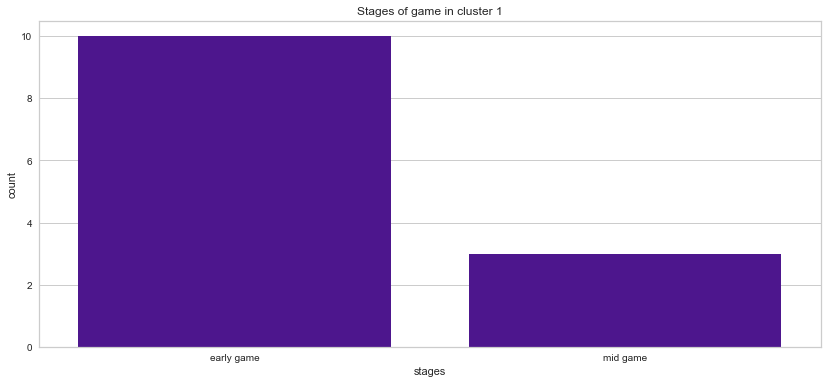

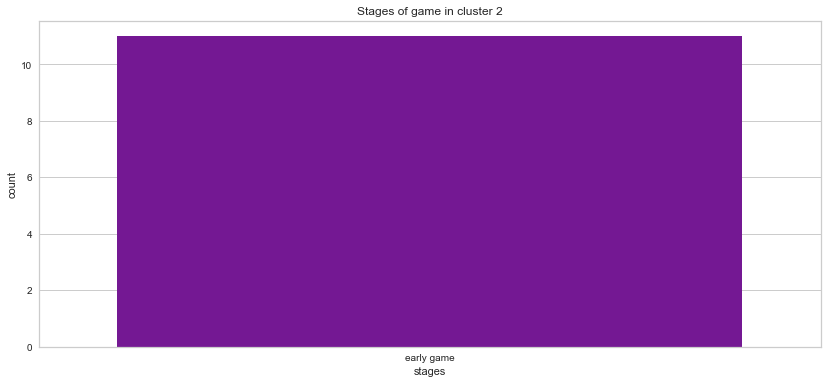

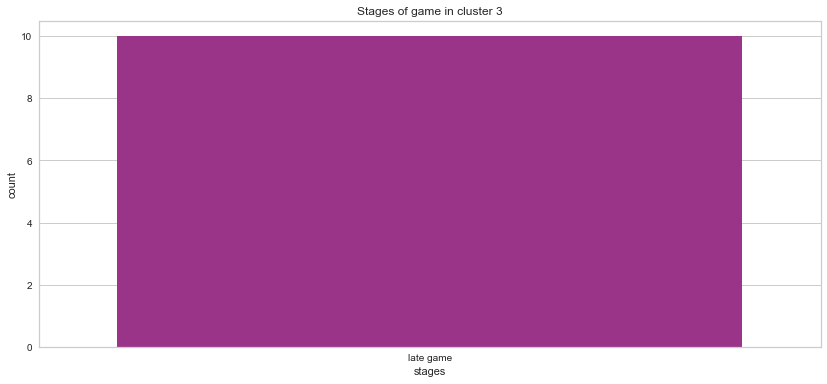

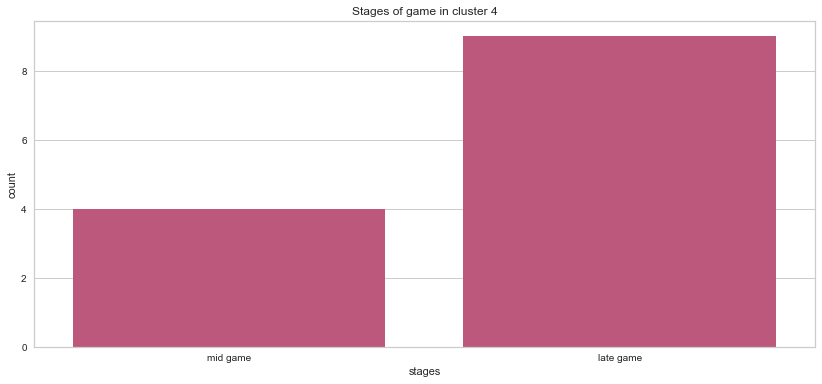

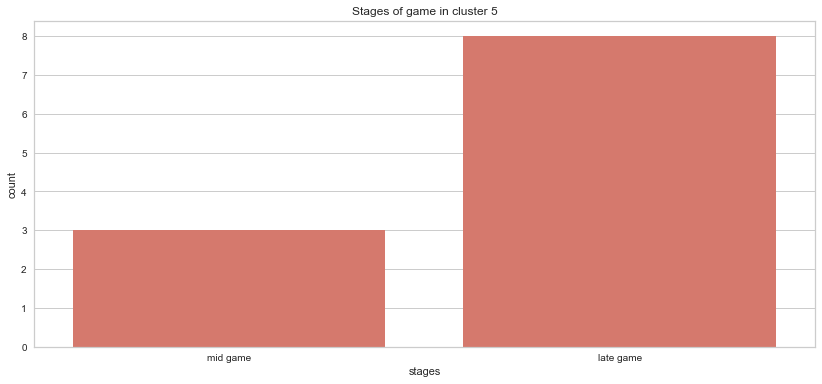

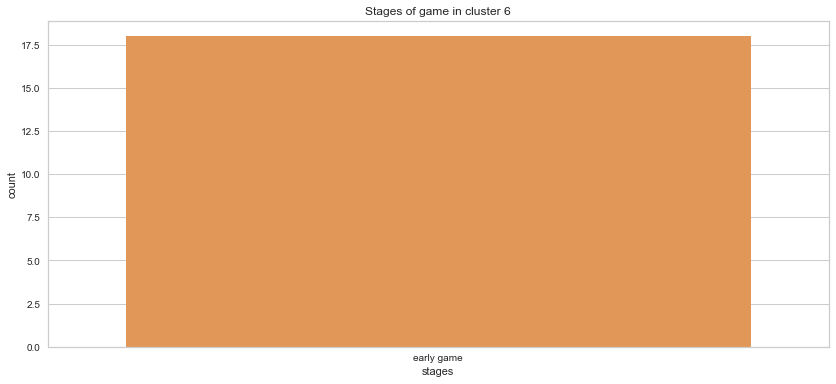

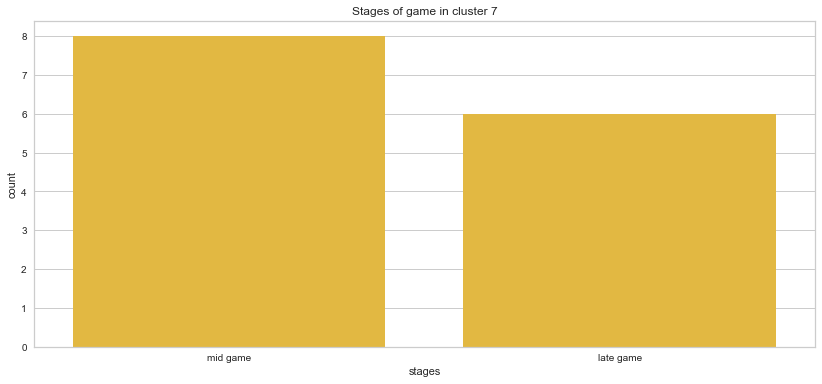

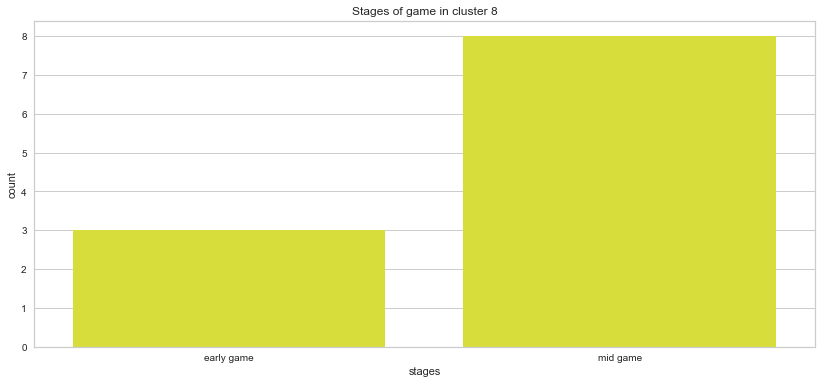

In [74]:
stagesPerCluster(blueSideDefeat_df, colors)